# "Mujeres y Niños primero":
## el Titanic abordado desde los datos.

Giamportone, Ariel L.

UpgradeHub 2024.

El Titanic representa un caso paradigmático en el mundo de la Seguridad Naútica. Marca un hecho histórico para establecer normas de seguridad en la navegación.
Es por ello que se propone realizar un análisis de datos sobre la base de un subconjunto del total de pasajeros al momento del hundimiento y bajo la premisa de encontrar una relación con la famosa frase "Mujeres y Niños Primero".


In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go 
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import statsmodels.api as sm
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [3]:
URL= 'titanic.csv'

# Preprocesamiento de los datos:

## Lectura y conversión del data set a DataFrame:

In [4]:
df_Titanic = pd.read_csv('titanic.csv')
df_Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_Titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
cantidad_fare_cero = df_Titanic[df_Titanic['Fare'] == 0]['PassengerId'].count()
cantidad_fare_cero

15

## Representatividad del conjunto de datos

In [7]:

cantidad_en_df = len(df_Titanic)

# Número total de pasajeros durante el incidente del Titanic 
numero_total_pasajeros = 2201 # Comisión Británica de Investigación En ese momento había alrededor de 2227 personas a bordo del buque, aunque es imposible determinar el número exacto debido a cancelaciones de última hora y la presencia de pasajeros clandestinos https://es.wikipedia.org/wiki/Hundimiento_del_RMS_Titanic

# Proporción de pasajeros el conjunto de datos
proporcion = cantidad_en_df / numero_total_pasajeros
print(f"La proporción de pasajeros en el conjunto de datos es: {proporcion:.4f}")



La proporción de pasajeros en el conjunto de datos es: 0.4048


En términos generales, el 40% es una proporción significativa y puede considerarse representativo, pero aún así, podría haber información adicional fuera de tu conjunto de datos que no esté incluida.

In [8]:
total_passengers_survived = 704 #Dato comisión británica de investigación

In [9]:
cantidad_sobrevivientes_endf = df_Titanic['Survived'].sum()
cantidad_sobrevivientes_endf

342

In [10]:
proporcion = cantidad_sobrevivientes_endf / total_passengers_survived

data_conjunto = {'Categoría': ['Pasajeros en el DataFrame', 'Total de Pasajeros'],
                 'Cantidad': [cantidad_sobrevivientes_endf, total_passengers_survived]}
df_visualizacion = pd.DataFrame(data_conjunto)

fig = px.bar(df_visualizacion, x='Categoría', y='Cantidad',
             labels={'Categoría': 'Pasajeros sobrevivientes', 'Cantidad': 'Cantidad de sobrevivientes'},
             title='Proporción de sobrevivientes en DataFrame vs Total de sobrevivientes del Titanic')

fig.update_traces(text=[f'{proporcion:.2%}', '100%'], textposition='outside')
fig.show()

Basados en el total de pasajeros y sobrevivientes del conjunto de datos podemos considerar que la muestra resulta representativa de la realidad.

## Valores faltantes por columna de pertenencia:

In [11]:
conteo_nulos= df_Titanic.isnull().sum()
conteo_nulos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
fig = px.imshow(df_Titanic.isnull().T, color_continuous_scale='Oranges')

fig.update_yaxes(title_text='Columnas', tickvals=list(range(len(df_Titanic.columns))), ticktext=df_Titanic.columns)
fig.update_coloraxes(colorscale='Oranges', cmin=0, cmax=1, colorbar=dict(title='Nulos/Faltantes'))
fig.update_layout(
    title='Valores Nulos o Faltantes en el DataFrame',
    xaxis_title='Nº de Fila',
    yaxis_title='Columna'
)
fig.show()

In [13]:

column_of_interest1 = 'Age'
column_of_interest2 = 'Fare'

Q1_Age = df_Titanic[column_of_interest1].quantile(0.25)
Q3_Age = df_Titanic[column_of_interest1].quantile(0.75)

Q1_Fare = df_Titanic[column_of_interest2].quantile(0.25)
Q3_Fare = df_Titanic[column_of_interest2].quantile(0.75)

IQR_Age = Q3_Age - Q1_Age
IQR_Fare = Q3_Fare - Q1_Fare

lower_limit_Age = Q1_Age - 1.2 * IQR_Age
upper_limit_Age = Q3_Age + 2 * IQR_Age

lower_limit_Fare = Q1_Fare - 1 * IQR_Fare
upper_limit_Fare = Q3_Fare + 1 * IQR_Fare

outliers_Age = df_Titanic[(df_Titanic[column_of_interest1] < lower_limit_Age) | (df_Titanic[column_of_interest1] > upper_limit_Age)]
outliers_Fare = df_Titanic[(df_Titanic[column_of_interest2] < lower_limit_Fare) | (df_Titanic[column_of_interest2] > upper_limit_Fare)]


In [14]:
outliers_Age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [15]:
fig = px.scatter(outliers_Age, x='PassengerId', y='Age', title='Outliers de Edad')
fig.update_traces(marker=dict(size=12, opacity=0.8))  
fig.show()

In [16]:
outliers_Fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [17]:
fig = px.scatter(outliers_Fare, x='PassengerId', y='Fare', title='Outliers para la tarifa')
fig.update_traces(marker=dict(size=12, opacity=0.8))  # Personalizar el tamaño y la opacidad de los puntos
fig.show()

## Columna 'Age'

### Completar datos faltantes para la columna 'Age' por método KNN (K vecinos más próximos)

In [18]:
df_Titanic['LastName'] = df_Titanic['Name'].apply(lambda x: x.split(',')[0])

In [19]:
columnas=['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked',"Age"]
encoder = OneHotEncoder(drop='first', sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df_Titanic[columnas]))
df_encoded.columns = encoder.get_feature_names_out(columnas)

c:\Users\Ariel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [20]:
df_encoded['Age'] = df_Titanic['Age']
df_with_age = df_encoded.dropna(subset=['Age'])
df_without_age = df_encoded[df_encoded['Age'].isna()].drop(columns='Age')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_with_age.drop(columns='Age'), df_with_age['Age'], test_size=0.2, random_state=357)

In [22]:
mse = []

In [23]:
k_range = range(1, 7)

In [24]:
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(scores.mean())
    print(f'scores = {scores}')

scores = [219.08405565 122.88157895 223.62027544 135.65153772 167.68399386]
scores = [136.52994217  82.51329496 155.70730219 105.13201404 123.60082807]
scores = [130.4628458   60.18006121 135.48813665 108.51132836 116.9991268 ]
scores = [117.66245815  67.15095137 127.62349945 110.55036469 131.51371228]
scores = [125.76203809  68.63970772 127.35082789 125.38223218 134.64002067]
scores = [127.75953862  76.2862182  126.66201508 128.28372641 138.96856813]


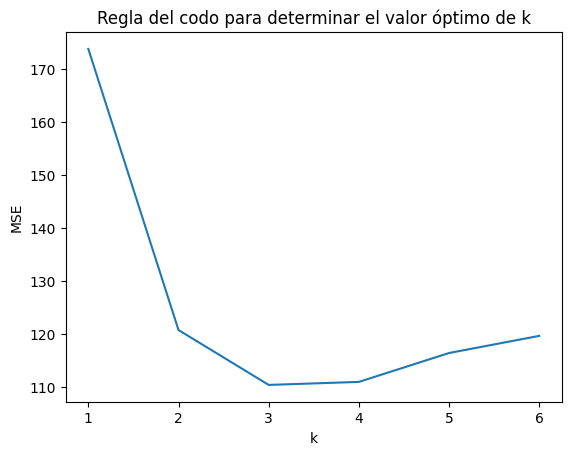

In [25]:
plt.plot(k_range, mse)
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('Regla del codo para determinar el valor óptimo de k')
plt.show()

In [26]:
best_k = k_range[mse.index(min(mse))]
print(f'Mejor número K: {best_k}')

Mejor número K: 3


In [27]:
knn = KNeighborsRegressor(n_neighbors=best_k)

In [28]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [29]:
imputed_ages = knn.predict(df_without_age)
df_Titanic.loc[df_Titanic['Age'].isna(), 'Age'] = imputed_ages

In [30]:
df_Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.666667,1,2,W./C. 6607,23.4500,NaN,S,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Behr


In [31]:
fig = px.imshow(df_Titanic.isnull().T, color_continuous_scale='Oranges')

fig.update_yaxes(title_text='Columnas', tickvals=list(range(len(df_Titanic.columns))), ticktext=df_Titanic.columns)
fig.update_coloraxes(colorscale='Oranges', cmin=0, cmax=1, colorbar=dict(title='Nulos/Faltantes'))
fig.update_layout(
    title='Valores Nulos o Faltantes en el DataFrame',
    xaxis_title='Nº de Fila',
    yaxis_title='Columna'
)
fig.show()

## Columna 'Cabin'

### Completar datos faltantes para la columna 'Cabin'

In [32]:
cabin_codes = {cabin: i for i, cabin in enumerate(df_Titanic['Cabin'].dropna().unique(), 1)}
df_Titanic['Cabin_NumberCat'] = df_Titanic['Cabin'].map(cabin_codes)
df_Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Cabin_NumberCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Montvila,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Graham,146.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.666667,1,2,W./C. 6607,23.4500,NaN,S,Johnston,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Behr,147.0


In [33]:
columnas=['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked',"Age","Ticket"]
encoder = OneHotEncoder(drop='first', sparse=False)
df_encoded2 = pd.DataFrame(encoder.fit_transform(df_Titanic[columnas]))
df_encoded2.columns = encoder.get_feature_names_out(columnas)

df_encoded2['Cabin_NumberCat'] = df_Titanic['Cabin_NumberCat']
df_with_cabin = df_encoded2.dropna(subset=['Cabin_NumberCat'])
df_without_cabin = df_encoded2[df_encoded2['Cabin_NumberCat'].isna()].drop(columns='Cabin_NumberCat')

c:\Users\Ariel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_with_cabin.drop(columns='Cabin_NumberCat'), df_with_cabin['Cabin_NumberCat'], test_size=0.2, random_state=357)

In [35]:
mse = []

In [36]:
k_range = range(1, 7)

In [37]:
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(scores.mean())
    print(f'scores = {scores}')

scores = [2596.39393939 2540.51515152 2880.93939394 2527.90625    1870.0625    ]
scores = [2259.38636364 1792.34848485 1773.4469697  2231.2578125  1587.1796875 ]
scores = [2138.7979798  1939.18518519 1642.3973064  1948.27777778 1824.73611111]
scores = [2068.09848485 2126.03409091 1749.35984848 2200.109375   1716.28710938]
scores = [1737.83151515 2162.51878788 1626.49454545 2115.855      1804.66      ]
scores = [1659.32996633 2329.93855219 1586.88720539 2042.39756944 1808.65017361]


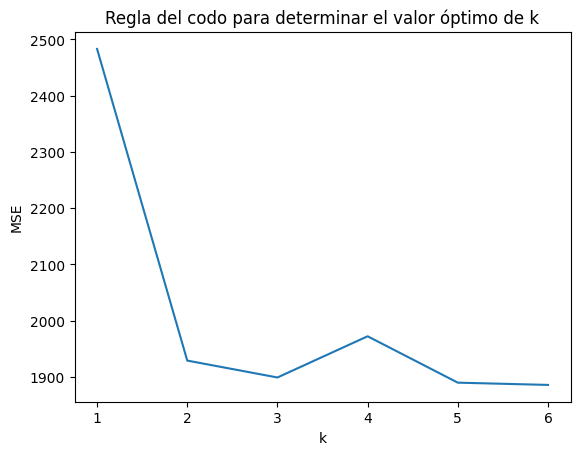

In [38]:
plt.plot(k_range, mse)
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('Regla del codo para determinar el valor óptimo de k')
plt.show()

In [39]:
best_k = k_range[mse.index(min(mse))]
print(f'Mejor número K: {best_k}')

Mejor número K: 6


In [40]:
knn = KNeighborsRegressor(n_neighbors=best_k)

In [41]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [42]:
imputed_cabins = knn.predict(df_without_cabin)
df_Titanic.loc[df_Titanic['Cabin_NumberCat'].isna(), 'Cabin_NumberCat'] = imputed_cabins

In [43]:
df_Titanic['Cabin'] = df_Titanic.groupby('Cabin_NumberCat')['Cabin'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [44]:
df_Titanic.loc[df_Titanic['Cabin'].isna(), 'Cabin'] = df_Titanic.loc[df_Titanic['Cabin'].isna(), 'Cabin_NumberCat'].map({val: cabin for val, cabin in zip(imputed_cabins, df_Titanic[df_Titanic['Cabin'].notna()]['Cabin'])})

In [45]:
missing_cabins = df_Titanic.loc[df_Titanic['Cabin'].isna() & df_Titanic['Cabin_NumberCat'].notna(), 'Cabin_NumberCat']

In [46]:
df_Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Cabin_NumberCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C52,S,Braund,65.166667
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,1.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C126,S,Heikkinen,67.166667
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,2.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,E46,S,Allen,85.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B49,S,Montvila,81.666667
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Graham,146.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.666667,1,2,W./C. 6607,23.4500,D,S,Johnston,75.833333
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Behr,147.000000


In [47]:
conteo_nulos= df_Titanic.isnull().sum()
conteo_nulos

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin              88
Embarked            2
LastName            0
Cabin_NumberCat     0
dtype: int64

### Parentezco por apellido

El atributo de la cabina en la cual estaba alojado el pasajero es compleja en el sentido que las variables del set de datos no pueden proporcionar una relación específica a esa asignación. Por ello, el data set será completado en primera medida por la relacion de apellido y asumiendo que compartian cabina por el parentezco:

In [48]:
# Agrupo por apellido y obtengo la moda de 'Cabin' por grupo
cabin_by_lastname = df_Titanic.groupby('LastName')['Cabin'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).to_dict()

# Función para rellenar los valores NaN en 'Cabin' basado en el apellido
def fill_cabin(row):
    if pd.isnull(row['Cabin']):
        return cabin_by_lastname.get(row['LastName'], np.nan)
    return row['Cabin']

# llenando los NaN en 'Cabin'
df_Titanic['Cabin'] = df_Titanic.apply(fill_cabin, axis=1)

In [49]:
fig = px.imshow(df_Titanic.isnull().T, color_continuous_scale='Oranges')

fig.update_yaxes(title_text='Columnas', tickvals=list(range(len(df_Titanic.columns))), ticktext=df_Titanic.columns)
fig.update_coloraxes(colorscale='Oranges', cmin=0, cmax=1, colorbar=dict(title='Nulos/Faltantes'))
fig.update_layout(
    title='Valores Nulos o Faltantes en el DataFrame',
    xaxis_title='Nº de Fila',
    yaxis_title='Columna'
)
fig.show()

In [50]:
conteo_nulos= df_Titanic.isnull().sum()
conteo_nulos

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin              55
Embarked            2
LastName            0
Cabin_NumberCat     0
dtype: int64

Hemos completado 33 datos en cabinas por la hipótesis de que mismo apellido comparten piso de camarote.

Usando una lógica similar, podemos agrupar la clase del pasajero y su apellido para inferir si eran posibles familiares viajando al menos en la misma cubierta, dado que la clase estaba asociada con la cubierta en cierta parte de la distribución de la embarcación, siendo:
-370 camarotes de primera clase 
-168 de segunda clase 
-297 cabinas compartidas de tercera Clase


In [51]:
grouped_LName_Pclass = df_Titanic.groupby(['Pclass', 'LastName']).size().reset_index(name='Count')
grouped_LName_Pclass

,Pclass,LastName,Count
0,1,Allen,1
1,1,Allison,3
2,1,Anderson,1
3,1,Andrews,2
4,1,Appleton,1
...,...,...,...
681,3,de Messemaeker,1
682,3,de Mulder,1
683,3,de Pelsmaeker,1
684,3,van Billiard,1


In [52]:
grouped_with_cabin = df_Titanic.groupby(['Pclass', 'LastName', 'Cabin']).size().reset_index(name='Count')
grouped_with_cabin

,Pclass,LastName,Cabin,Count
0,1,Allen,B5,1
1,1,Allison,C22 C26,3
2,1,Anderson,E12,1
3,1,Andrews,A36,1
4,1,Andrews,D7,1
...,...,...,...,...
729,3,Zimmerman,E50,1
730,3,de Mulder,E10,1
731,3,de Pelsmaeker,B22,1
732,3,van Billiard,B42,1


In [53]:
# Agrupo por apellido y obtener la moda de 'Cabin' por grupo
cabin_by_lastname = df_Titanic.groupby('LastName')['Cabin'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).to_dict()

# Rellenamos los valores NaN en 'Cabin' basados en el apellido
def fill_cabin(row):
    if pd.isnull(row['Cabin']):
        return cabin_by_lastname.get(row['LastName'], np.nan)
    return row['Cabin']

# llenamos los NaN en 'Cabin'
df_Titanic['Cabin'] = df_Titanic.apply(fill_cabin, axis=1)

In [54]:
conteo_nulos= df_Titanic.isnull().sum()
conteo_nulos

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin              55
Embarked            2
LastName            0
Cabin_NumberCat     0
dtype: int64

No se observan cambios dado que todos los espacios con coincidencia por Apellido comparten cabina.

Ahora en otra escala por coincidencia de la clase del pasajero y el Ticket:

In [55]:
grouped_with_tiket = df_Titanic.groupby(['Pclass', 'LastName', 'Ticket']).size().reset_index(name='Count')
grouped_with_tiket

,Pclass,LastName,Ticket,Count
0,1,Allen,24160,1
1,1,Allison,113781,3
2,1,Anderson,19952,1
3,1,Andrews,112050,1
4,1,Andrews,13502,1
...,...,...,...,...
734,3,de Messemaeker,345572,1
735,3,de Mulder,345774,1
736,3,de Pelsmaeker,345778,1
737,3,van Billiard,A/5. 851,1


In [56]:
# Agrupamos por Tiket y obtener la moda de 'Cabin' por grupo
cabin_by_ticket = df_Titanic.groupby('Ticket')['Cabin'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).to_dict()

def fill_cabin(row):
    if pd.isnull(row['Cabin']):
        return cabin_by_ticket.get(row['Ticket'], np.nan)
    return row['Cabin']

df_Titanic['Cabin'] = df_Titanic.apply(fill_cabin, axis=1)

In [57]:
conteo_nulos= df_Titanic.isnull().sum()
conteo_nulos

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin              48
Embarked            2
LastName            0
Cabin_NumberCat     0
dtype: int64

Logramos inferir siete datos más para las cabinas, pero, con los datos de las columnas en este punto no podremos obtener más que el tipo de camarote basados en la Letra que precede al número de camarote. Para ello, generamos la nueva columna 'Ccabin' que hace referencia a la clase de la Cabina:

In [58]:
# Agrupar por cantidad de hermanos y obtener la moda de 'Cabin' por grupo
cabin_by_sibsp = df_Titanic.groupby('SibSp')['Cabin'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).to_dict()

def fill_cabin(row):
    if pd.isnull(row['Cabin']):
        return cabin_by_sibsp.get(row['SibSp'], np.nan)
    return row['Cabin']

df_Titanic['Cabin'] = df_Titanic.apply(fill_cabin, axis=1)

In [59]:
conteo_nulos= df_Titanic.isnull().sum()
conteo_nulos

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           2
LastName           0
Cabin_NumberCat    0
dtype: int64

Finalmente, agrupados por cantidad de hermanos en el buque podemos completar la columna basados en la premisa de que las familias viajaban en cabinas vecinas.

In [60]:
fig = px.imshow(df_Titanic.isnull().T, color_continuous_scale='Oranges')

fig.update_yaxes(title_text='Columnas', tickvals=list(range(len(df_Titanic.columns))), ticktext=df_Titanic.columns)
fig.update_coloraxes(colorscale='Oranges', cmin=0, cmax=1, colorbar=dict(title='Nulos/Faltantes'))
fig.update_layout(
    title='Valores Nulos o Faltantes en el DataFrame',
    xaxis_title='Nº de Fila',
    yaxis_title='Columna'
)
fig.show()

In [61]:
df_Titanic['Ccabin'] = df_Titanic['Cabin'].str.extract(r'([A-Za-z]+)', expand=False)
df_Titanic['Ccabin'] = df_Titanic['Ccabin'].fillna(df_Titanic['Cabin'])
df_Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Cabin_NumberCat,Ccabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C52,S,Braund,65.166667,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,1.000000,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C126,S,Heikkinen,67.166667,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,2.000000,C
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,E46,S,Allen,85.833333,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B49,S,Montvila,81.666667,B
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Graham,146.000000,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.666667,1,2,W./C. 6607,23.4500,D,S,Johnston,75.833333,D
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Behr,147.000000,C


In [62]:
conteo_nulos= df_Titanic.isnull().sum()
conteo_nulos

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           2
LastName           0
Cabin_NumberCat    0
Ccabin             0
dtype: int64

Hemos logrado asignar la clase de cabina en la cuál se encontraban los pasajeros basados en el las premisas del parentezco, el tiket y la clase, ahora podemos completar la columna Cabin con el tipo de camarote, que nos servirá para analizar su relacion con la supervivencia en el incidente:

In [63]:
df_Titanic['Cabin'].fillna(df_Titanic['Ccabin'], inplace=True)


In [64]:
conteo_nulos= df_Titanic.isnull().sum()
conteo_nulos

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           2
LastName           0
Cabin_NumberCat    0
Ccabin             0
dtype: int64

In [65]:
ccabin_counts = df_Titanic['Ccabin'].value_counts()
pclass_counts = df_Titanic['Pclass'].value_counts()

fig = px.bar(x=ccabin_counts.index, y=ccabin_counts.values, labels={'x': 'Clase de Cabina', 'y': 'Cantidad de Pasajeros'}, 
             title='Pasajeros por Clase de Cabina')
fig.add_bar(x=pclass_counts.index, y=pclass_counts.values, name='Clase de Pasajero')
fig.update_layout(barmode='group')
fig.show()

## Columna 'Embarked'

### Completar los datos faltantes para el puerto donde embarcó el pasajero (columna "Embarked")


In [66]:
df_Titanic[df_Titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Cabin_NumberCat,Ccabin
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Icard,13.0,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Stone,13.0,B


In [67]:
df_Titanic['Pclass'] = df_Titanic['Pclass'].astype(str)

fig = px.bar(df_Titanic, x='Pclass', color='Embarked',
             category_orders={"Pclass": ["1", "2", "3"]}, # Ordenar la columna Pclass
             color_discrete_map={"S": "green", "C": "blue", "Q": "red"},
             labels={'Pclass': 'Clase', 'Embarked': 'Ciudad de Embarque'},
             title='Cantidad de Pasajeros por Ciudad y Clase')

fig.update_layout(legend=dict(x=1.0, y=1.0))

fig.show()

Ambas pasajeras comparten cabina y clase, además por la diferencia de edad podrian ser madre e hija o abuela y nieta. 
De la gráfica podemos observar que para la primera clase, la ciudad Queestown queda descartada dado que es muy baja la cantidad de gente que compró tickets para esa categoría. Por otra parte, en la gráfica se aprecia que una buena cantidad de las personas en esta clase provenían de Southampton, pero también de Cherbourg:

In [68]:
pclass_1_passengers = df_Titanic[df_Titanic['Pclass'] == '1']

cantidad = pclass_1_passengers['PassengerId'].count()
st = pclass_1_passengers[pclass_1_passengers['Embarked'] == 'S']['PassengerId'].count()
st_porcentaje=st/cantidad
print(f'Porcentaje de pasajeros embarcados en Southampton para 1º Clase: {st_porcentaje}')



Porcentaje de pasajeros embarcados en Southampton para 1º Clase: 0.5879629629629629


Si revisamos los datos de la cabina para ver si alguien más compartía el camarote podriamos hallar el puerto de embarque de algun acompañante e inferir que ambas mujeres embarcaron en ese mismo puerto:

In [69]:
df_Titanic[df_Titanic['Cabin'] == 'B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Cabin_NumberCat,Ccabin
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,Icard,13.000000,B
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,B28,S,Asim,76.166667,B
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,B28,C,Ringhini,76.166667,B
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,B28,S,Hirvonen,76.166667,B
590,591,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,B28,S,Rintamaki,76.166667,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN,Stone,13.000000,B


Son las unicas dos que iban en ese camarote, por lo tanto debemos suponer que se embarcaron donde embarcó la mayoría para esa clase. Resultando, como hemos calculado, el puerto de Southampton el más probable.

In [70]:
df_Titanic['Embarked'] = df_Titanic['Embarked'].fillna('S')

In [71]:
fig = px.imshow(df_Titanic.isnull().T, color_continuous_scale='Oranges')

fig.update_yaxes(title_text='Columnas', tickvals=list(range(len(df_Titanic.columns))), ticktext=df_Titanic.columns)
fig.update_coloraxes(colorscale='Oranges', cmin=0, cmax=1, colorbar=dict(title='Nulos/Faltantes'))
fig.update_layout(
    title='Valores Nulos o Faltantes en el DataFrame',
    xaxis_title='Nº de Fila',
    yaxis_title='Columna'
)
fig.show()

Finalmente hemos completado el set de datos con algunas premisas basadas en la información disponible y de investigación sobre el Titanic, su estructura y datos históricos.

## Comprobar posibles filas duplicadas:

In [72]:
filas_duplicadas = df_Titanic[df_Titanic.duplicated()]

# mostrar las filas duplicadas:
print("Filas duplicadas:")
print(filas_duplicadas)

# contar el número de filas duplicadas:
numero_filas_duplicadas = df_Titanic.duplicated().sum()
print(f"Número de filas duplicadas: {numero_filas_duplicadas}")

Filas duplicadas:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, LastName, Cabin_NumberCat, Ccabin]
Index: []
Número de filas duplicadas: 0


# Ingeniería de Datos para mayor información y limpieza de datos:

## Distinción social de los pasajeros por Titulación en el embarque:

In [73]:
df_Titanic['Title'] = df_Titanic.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())
df_Titanic['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

## Resumiendo los Títulos de los pasajeros
Las titulaciones en la época del Titanic eran una marcada fuente de información de clase social que podemos considerar en el análisis: 
- Lady, Don, Dona, Jonkheer, the Countess, Sir, Rev, Dr.:  títulos para los nobles de la época.
- Ms y Mlle: variaciones para Miss y Mme equivalente a Madame y relativo a Mrs. 
Para ello recategorizamos los datos:


In [74]:
df_Titanic['Title'] = df_Titanic['Title'].replace(['Dr','Rev','the Countess','Jonkheer','Lady','Sir', 'Don','Dona'],'Nobles')
df_Titanic['Title'] = df_Titanic['Title'].replace(['Ms','Mlle'],'Miss')
df_Titanic['Title'] = df_Titanic['Title'].replace(['Mme'],'Mrs')

df_Titanic['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Nobles     18
Major       2
Col         2
Capt        1
Name: count, dtype: int64

Se debe considerar que hay titulaciones propias del personal de la embarcación y que a los fines del análisis se deben distinguir. Entre los títulos del personal se distinguen: Col, Major y Capt. Los mencionados seran de la misma categoria denominada Marinos:


In [75]:
df_Titanic['Title'] = df_Titanic['Title'].replace(['Col','Major','Capt'],'Marinos')
titulos_df= df_Titanic['Title'].value_counts()
titulos_df

Title
Mr         517
Miss       185
Mrs        126
Master      40
Nobles      18
Marinos      5
Name: count, dtype: int64

## Asignarle códigos numéricos a 'Title'

Le asignaremos un código numérico a cada título social

In [76]:
codigo_titulo_map = {
    'Mr': 1,
    'Miss': 2,
    'Mrs': 3,
    'Master': 4,
    'Nobles': 5,
    'Marinos': 6
}

# Crear la nueva columna 'Codigo_Titulo' mediante mapeo utilizando el diccionario
df_Titanic['Codigo_Titulo'] = df_Titanic['Title'].map(codigo_titulo_map)

In [77]:
df_Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Cabin_NumberCat,Ccabin,Title,Codigo_Titulo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C52,S,Braund,65.166667,C,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,1.000000,C,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C126,S,Heikkinen,67.166667,C,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,2.000000,C,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,E46,S,Allen,85.833333,E,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B49,S,Montvila,81.666667,B,Nobles,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Graham,146.000000,B,Miss,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.666667,1,2,W./C. 6607,23.4500,D,S,Johnston,75.833333,D,Miss,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Behr,147.000000,C,Mr,1


## Asignarle código a las clases de Edades (Niños, Adultos)

### Generar una columna para distinguir niños de adultos

In [78]:
def categorize_age(age):
    if age < 12:
        return 'Niño'
    else:
        return 'Adulto'

In [79]:
df_Titanic['Age_Category'] = df_Titanic['Age'].apply(categorize_age)

In [80]:
df_Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Cabin_NumberCat,Ccabin,Title,Codigo_Titulo,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C52,S,Braund,65.166667,C,Mr,1,Adulto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,1.000000,C,Mrs,3,Adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C126,S,Heikkinen,67.166667,C,Miss,2,Adulto
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,2.000000,C,Mrs,3,Adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,Allen,85.833333,E,Mr,1,Adulto


In [81]:
tipo_Age_map = {
    'Adulto': 1,
    'Niño': 2
    
}

#  nueva columna 'Tipo_Edad' 
df_Titanic['Tipo_Edad'] = df_Titanic['Age_Category'].map(tipo_Age_map)

## Asignarle códigos numéricos a Ccabin

In [82]:
tipo_cabina_map = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'T': 8,
}

#  nueva columna 'Tipo_Cabina' mediante mapeo 
df_Titanic['Tipo_Cabina'] = df_Titanic['Ccabin'].map(tipo_cabina_map)


In [83]:
df_Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Cabin_NumberCat,Ccabin,Title,Codigo_Titulo,Age_Category,Tipo_Edad,Tipo_Cabina
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C52,S,Braund,65.166667,C,Mr,1,Adulto,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,1.000000,C,Mrs,3,Adulto,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C126,S,Heikkinen,67.166667,C,Miss,2,Adulto,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,2.000000,C,Mrs,3,Adulto,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,E46,S,Allen,85.833333,E,Mr,1,Adulto,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B49,S,Montvila,81.666667,B,Nobles,5,Adulto,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Graham,146.000000,B,Miss,2,Adulto,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.666667,1,2,W./C. 6607,23.4500,D,S,Johnston,75.833333,D,Miss,2,Adulto,1,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Behr,147.000000,C,Mr,1,Adulto,1,3


# Análisis de Datos Exploratorio:

## Diagnóstico de pasajeros previo al incidente:

In [84]:
df_Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Cabin_NumberCat,Ccabin,Title,Codigo_Titulo,Age_Category,Tipo_Edad,Tipo_Cabina
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C52,S,Braund,65.166667,C,Mr,1,Adulto,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,1.000000,C,Mrs,3,Adulto,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C126,S,Heikkinen,67.166667,C,Miss,2,Adulto,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,2.000000,C,Mrs,3,Adulto,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,Allen,85.833333,E,Mr,1,Adulto,1,5


### Clasificación de pasajeros por edad

In [85]:
columnas_a_analizar = ['Age']
descripcion_age = df_Titanic[columnas_a_analizar].describe()
descripcion_age

,Age
count,891.000000
mean,29.726626
std,13.691784
min,0.420000
25%,21.000000
50%,28.166667
75%,37.000000
max,80.000000


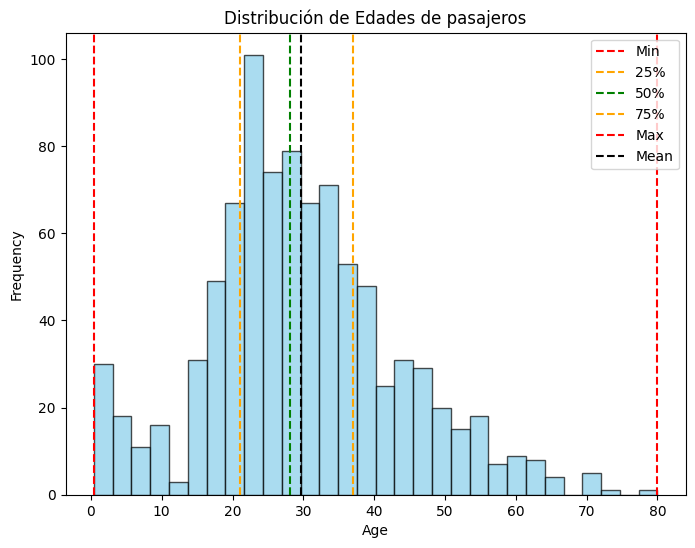

In [86]:

estadisticas_age = {
    'count': 891.000000,
    'mean': 29.726626,
    'std': 13.691784,
    'min': 0.420000,
    '25%': 21.000000,
    '50%': 28.166667,
    '75%': 37.000000,
    'max': 80.000000
}

data_age = df_Titanic['Age'].dropna()  

plt.figure(figsize=(8, 6))
plt.hist(data_age, bins=30, alpha=0.7, color='skyblue', edgecolor='black')  

plt.axvline(x=estadisticas_age['min'], color='red', linestyle='--', label='Min')
plt.axvline(x=estadisticas_age['25%'], color='orange', linestyle='--', label='25%')
plt.axvline(x=estadisticas_age['50%'], color='green', linestyle='--', label='50%')
plt.axvline(x=estadisticas_age['75%'], color='orange', linestyle='--', label='75%')
plt.axvline(x=estadisticas_age['max'], color='red', linestyle='--', label='Max')
plt.axvline(x=estadisticas_age['mean'], color='black', linestyle='--', label='Mean')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribución de Edades de pasajeros')

plt.show()

#### Clasificación de pasajeros Niños - Adultos

In [87]:
limite_nino = 12

# nueva columna 'Tipo_Edad' basada en límite de edad
df_Titanic['Tipo_Edad'] = df_Titanic['Age'].apply(lambda x: 'Niño' if x <= limite_nino else 'Adulto')

# porcentaje de niños y adultos
porcentaje_ninos = (df_Titanic['Tipo_Edad'] == 'Niño').sum() / len(df_Titanic) * 100
porcentaje_adultos = (df_Titanic['Tipo_Edad'] == 'Adulto').sum() / len(df_Titanic) * 100

print(f"Porcentaje de pasajeros niños: {porcentaje_ninos:.2f}%")
print(f"Porcentaje de pasajeros adultos: {porcentaje_adultos:.2f}%")

Porcentaje de pasajeros niños: 8.53%
Porcentaje de pasajeros adultos: 91.47%


In [88]:
child_distribution = df_Titanic['Age_Category'].value_counts()

colors = {'Adulto': 'Blue', 'Niño': 'Niño'}
fig = px.bar(x=child_distribution.index, y=child_distribution.values, 
             color=child_distribution.index.map(colors),
             labels={'x': 'Categoria según la edad', 'y': 'Cantidad de Pasajeros'},
             title='Distribución de Pasajeros según la edad')
fig.update_traces(marker_line_width=0) 

fig.show()

### Clasificación de pasajeros por género 

In [89]:
descripcion_columnas_categoricas = df_Titanic['Sex'].describe(include=['object'])
descripcion_columnas_categoricas

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [90]:
porcentaje_male = (df_Titanic['Sex'] == 'male').sum() / len(df_Titanic) * 100
porcentaje_female = (df_Titanic['Sex'] == 'female').sum() / len(df_Titanic) * 100

print(f"Porcentaje de pasajeros masculinos: {porcentaje_male:.2f}%")
print(f"Porcentaje de pasajeros femeninos: {porcentaje_female:.2f}%")

Porcentaje de pasajeros masculinos: 64.76%
Porcentaje de pasajeros femeninos: 35.24%


In [91]:
sex_distribution = df_Titanic['Sex'].value_counts()

colors = {'male': 'male', 'female': 'Female'}
fig = px.bar(x=sex_distribution.index, y=sex_distribution.values, 
             color=sex_distribution.index.map(colors),
             labels={'x': 'Sexo', 'y': 'Cantidad de Pasajeros'},
             title='Distribución de Sexos de los Pasajeros')
fig.update_coloraxes(colorbar_title='Sexo', colorbar_tickvals=[0, 1], colorbar_ticktext=['Male', 'Female'])
fig.update_traces(marker_line_width=0) 

fig.show()

### Clasificación de pasajeros por Clase

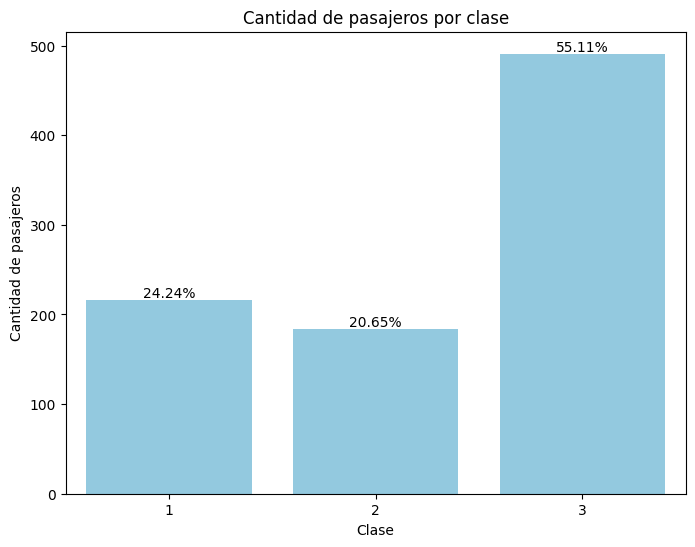

In [92]:
counts_by_class = df_Titanic['Pclass'].value_counts().sort_index()

percentages = (counts_by_class / counts_by_class.sum()) * 100

data = pd.DataFrame({'Clase': counts_by_class.index, 'Cantidad': counts_by_class.values, 'Porcentaje': percentages})

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Clase', y='Cantidad', data=data, color='skyblue')
for index, row in data.iterrows():
    barplot.text(row.name, row['Cantidad'] + 3, f'{row["Porcentaje"]:.2f}%', color='black', ha='center')

plt.xlabel('Clase')
plt.ylabel('Cantidad de pasajeros')
plt.title('Cantidad de pasajeros por clase')
plt.legend([], [], frameon=False)
plt.show()

### Clasificación de pasajeros por tarifa

In [93]:
columnas_a_analizar = ['Fare']
descripcion_fare = df_Titanic[columnas_a_analizar].describe()
descripcion_fare

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


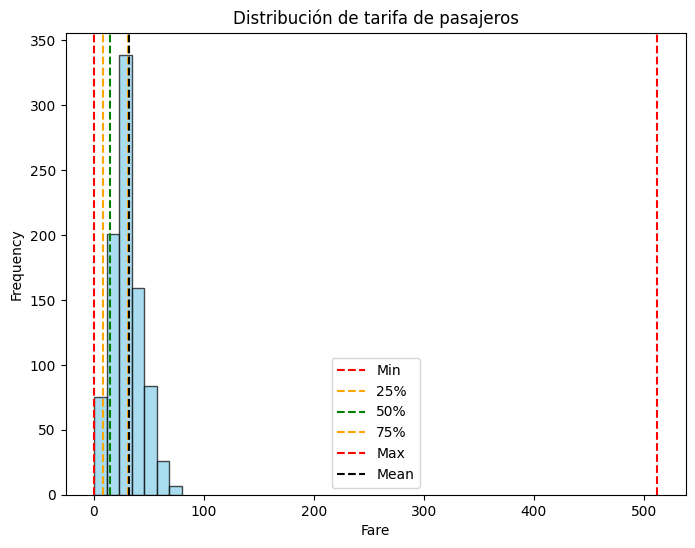

In [94]:
# Datos estadísticos de la columna 'Age'
estadisticas_fare = {
    'count': 891.000000,
    'mean': 32.204208,
    'std': 49.693429,
    'min': 0.000000,
    '25%': 7.910400,
    '50%': 14.454200,
    '75%': 31.000000,
    'max': 512.329200
}

# datos de la columna 'Fare'
data_fare = df_Titanic['Fare'].dropna()  

plt.figure(figsize=(8, 6))
plt.hist(data_age, bins=7, alpha=0.7, color='skyblue', edgecolor='black')  # Histograma de la columna 'Age'

plt.axvline(x=estadisticas_fare['min'], color='red', linestyle='--', label='Min')
plt.axvline(x=estadisticas_fare['25%'], color='orange', linestyle='--', label='25%')
plt.axvline(x=estadisticas_fare['50%'], color='green', linestyle='--', label='50%')
plt.axvline(x=estadisticas_fare['75%'], color='orange', linestyle='--', label='75%')
plt.axvline(x=estadisticas_fare['max'], color='red', linestyle='--', label='Max')
plt.axvline(x=estadisticas_fare['mean'], color='black', linestyle='--', label='Mean')

plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribución de tarifa de pasajeros')

plt.show()

### Clasificación por edad, sexo y clase de los pasajeros abordo

In [95]:
df_Titanic['Age_Category'] = pd.cut(df_Titanic['Age'], bins=[0, 12, df_Titanic['Age'].max()], labels=['Niño', 'Adulto'])

# Agrupamos 'Pclass', 'Sex' y 'Age_Category' para contar el número de pasajeros
df_NAM = df_Titanic.groupby(['Pclass', 'Sex', 'Age_Category']).size().reset_index(name='Count')
df_NAM

C:\Users\Ariel\AppData\Local\Temp\ipykernel_13544\564730054.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Pclass,Sex,Age_Category,Count
0,1,female,Niño,1
1,1,female,Adulto,93
2,1,male,Niño,3
3,1,male,Adulto,119
4,2,female,Niño,8
5,2,female,Adulto,68
6,2,male,Niño,9
7,2,male,Adulto,99
8,3,female,Niño,27
9,3,female,Adulto,117


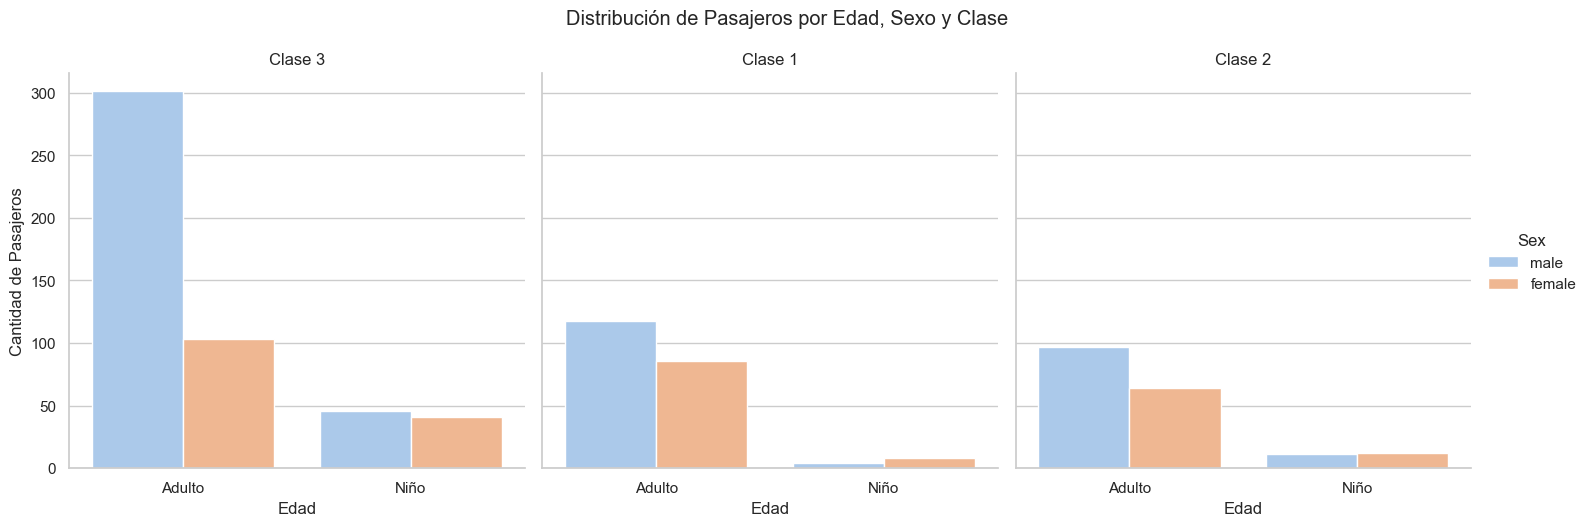

In [96]:
# Agregar columna 'Age_Category' para clasificar por edad
df_Titanic['Age_Category'] = df_Titanic['Age'].apply(lambda x: 'Niño' if x < 18 else 'Adulto')

sns.set(style='whitegrid')
g = sns.catplot(x='Age_Category', hue='Sex', col='Pclass', data=df_Titanic, kind='count', palette='pastel')

g.set_axis_labels('Edad', 'Cantidad de Pasajeros')
g.set_titles('Clase {col_name}')
g.fig.suptitle('Distribución de Pasajeros por Edad, Sexo y Clase', y=1.05)

plt.show()

### Variables Edad y Sexo de los pasajeros

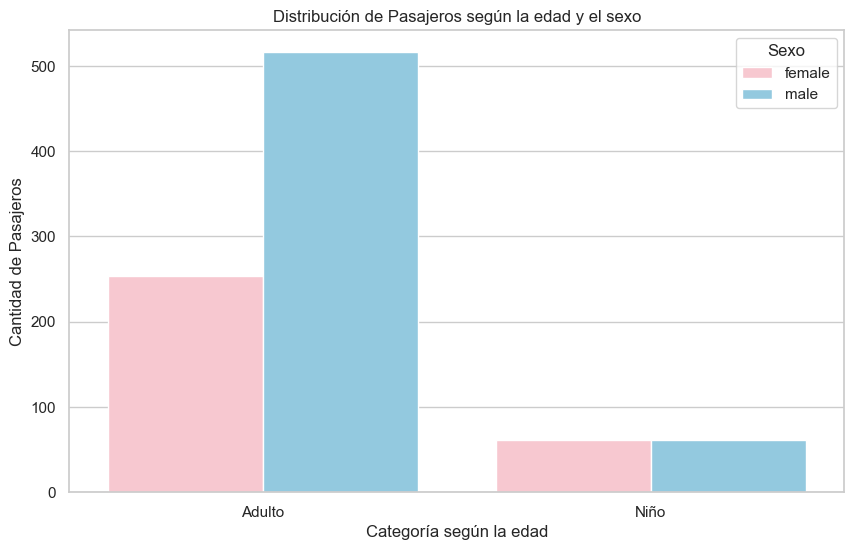

In [97]:
age_sex_distribution = df_Titanic.groupby(['Age_Category', 'Sex']).size().reset_index(name='Cantidad')

# colores personalizada para 'Sex'
custom_palette = {'female': 'pink', 'male': 'skyblue'}

plt.figure(figsize=(10, 6))
sns.barplot(data=age_sex_distribution, x='Age_Category', y='Cantidad', hue='Sex', palette=custom_palette)

plt.xlabel('Categoría según la edad')
plt.ylabel('Cantidad de Pasajeros')
plt.title('Distribución de Pasajeros según la edad y el sexo')
plt.legend(title='Sexo')

plt.show()

### Correlación entre valores numéricos:

In [98]:
df_Titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Cabin_NumberCat,Ccabin,Title,Codigo_Titulo,Age_Category,Tipo_Edad,Tipo_Cabina
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C52,S,Braund,65.166667,C,Mr,1,Adulto,Adulto,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,1.000000,C,Mrs,3,Adulto,Adulto,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C126,S,Heikkinen,67.166667,C,Miss,2,Adulto,Adulto,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,2.000000,C,Mrs,3,Adulto,Adulto,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,Allen,85.833333,E,Mr,1,Adulto,Adulto,5


In [99]:
subset_numerico_df_Titanic = df_Titanic[['Age', 'Fare', 'Survived', 'Pclass','Sex','Tipo_Cabina','Codigo_Titulo','Tipo_Edad']]


In [100]:
subset_numerico_df_Titanic['Sex'] = subset_numerico_df_Titanic['Sex'].map({'male': 0, 'female': 1})


In [101]:
subset_numerico_df_Titanic['Tipo_Edad'] = subset_numerico_df_Titanic['Tipo_Edad'].map({'Adulto': 0, 'Niño': 1})

In [102]:
subset_numerico_df_Titanic

,Age,Fare,Survived,Pclass,Sex,Tipo_Cabina,Codigo_Titulo,Tipo_Edad
0,22.000000,7.2500,0,3,0,3,1,0
1,38.000000,71.2833,1,1,1,3,3,0
2,26.000000,7.9250,1,3,1,3,2,0
3,35.000000,53.1000,1,1,1,3,3,0
4,35.000000,8.0500,0,3,0,5,1,0
...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,0,2,0,2,5,0
887,19.000000,30.0000,1,1,1,2,2,0
888,22.666667,23.4500,0,3,1,4,2,0
889,26.000000,30.0000,1,1,0,3,1,0


In [103]:
correlation_matrix = subset_numerico_df_Titanic.corr()


# Crear el mapa de calor con Plotly
fig = ff.create_annotated_heatmap(z=correlation_matrix.values,
                                  x=list(correlation_matrix.columns),
                                  y=list(correlation_matrix.index),
                                  colorscale='RdBu',
                                  annotation_text=correlation_matrix.round(2).values,
                                  showscale=True)
fig.update_layout(title='Mapa de calor de correlación', xaxis_title='Variables', yaxis_title='Variables')
fig.show()

Correlación positiva (valores cercanos a 1): Indica que a medida que el valor de una variable aumenta, el valor de la otra variable también tiende a aumentar. Cuando la correlación se acerca a 1, se considera una correlación positiva fuerte.

Correlación negativa (valores cercanos a -1): Indica que a medida que el valor de una variable aumenta, el valor de la otra variable tiende a disminuir. Cuando la correlación se acerca a -1, se considera una correlación negativa fuerte.

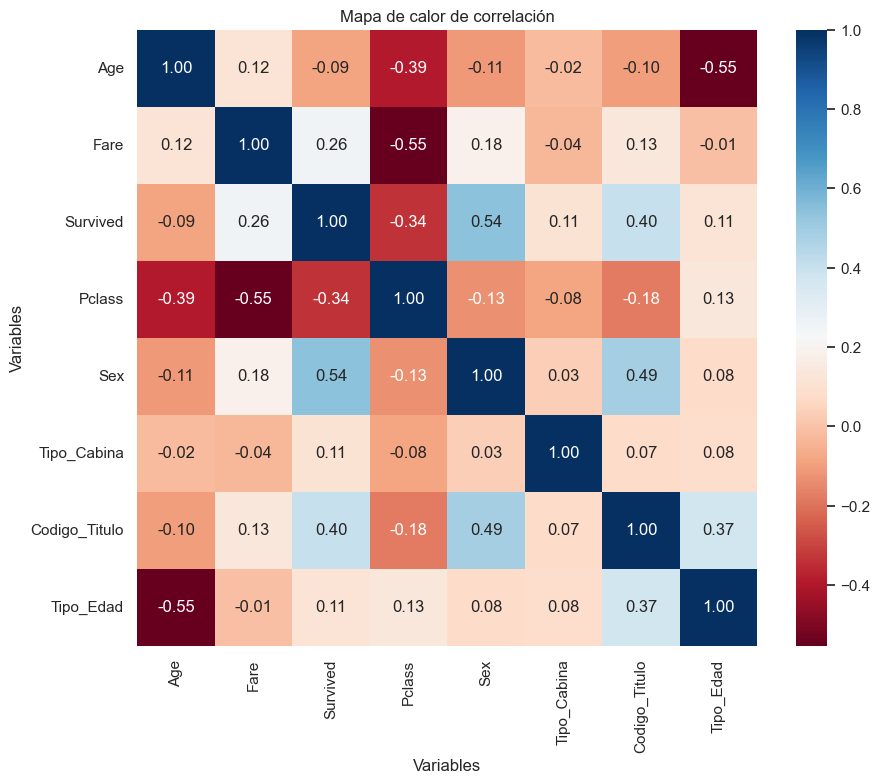

In [104]:
correlation_matrix = subset_numerico_df_Titanic.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor utilizando Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt='.2f')

# Establecer títulos y etiquetas de los ejes
plt.title('Mapa de calor de correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar el mapa de calor
plt.show()

Hay una mayor correlación entre el sexo y la supervivencia. Nos da una idea de las consideraciones prioritarias para determinar el conjunto de pasajeros sobrevivientes (y la relacion con nuestra hipótesis de "Las mujeres y niños primero") y en tal sentido analizaremos:
* 1º Relación Sexo Vs. Supervivencia
* 2º Relación Titulo Vs. Supervivencia
* 3ª Relación Clase Vs. Supervivencia
* 4º Relación Tarifa Vs. Supervivencia
* 5º Relación Niño/Adulto Vs. Supervivencia
* 6º Relación Tipo de Cabina Vs. Supervivenvcia


Conocer la tarifa más elevada y la menos elevada nos puede orientar en las ventajas de supervivencia por la cercania a la planta de los botes salvavida:

## Diagnóstico de pasajeros luego del incidente

In [107]:
total_sobrevivientes = (df_Titanic['Survived'] == 1).sum()
total_sobrevivientes

342

In [108]:
total_passengers = len(df_Titanic)
survived = df_Titanic['Survived'].sum()
not_survived = total_passengers - survived

data = {'Status': ['Sobrevivientes', 'No Sobrevivientes'], 'Cantidad': [survived, not_survived]}
df_status = pd.DataFrame(data)

df_status['Porcentaje'] = df_status['Cantidad'] / total_passengers * 100

fig = px.bar(df_status, x='Status', y='Porcentaje', text='Porcentaje', 
             title='Proporción de Sobrevivientes sobre el Total de Pasajeros',
             labels={'Porcentaje': 'Porcentaje (%)', 'Status': 'Estado'})

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_yaxes(range=[0, 100])
fig.show()

### 1º Relación Sexo Vs. Supervivencia

C:\Users\Ariel\AppData\Local\Temp\ipykernel_13544\4272556983.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




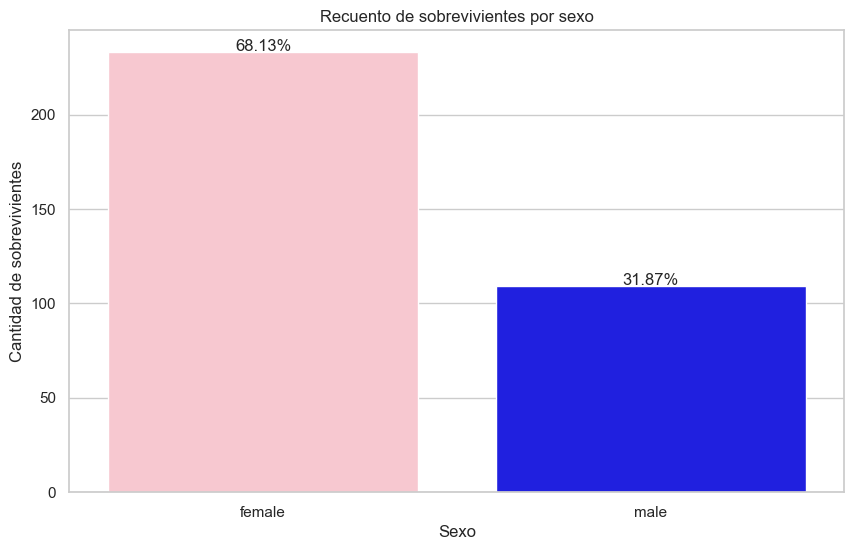

In [109]:

sobrevivientes_sexo = df_Titanic.groupby('Sex')['Survived'].sum().reset_index()
sobrevivientes_sexo['Porcentaje'] = sobrevivientes_sexo['Survived'] / sobrevivientes_sexo['Survived'].sum() * 100

colores_personalizados = {'male': 'blue', 'female': 'pink'}

plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=sobrevivientes_sexo, palette=colores_personalizados)

for index, value in enumerate(sobrevivientes_sexo['Porcentaje']):
    plt.text(index, sobrevivientes_sexo['Survived'][index] + 1, f'{value:.2f}%', ha='center')

plt.title('Recuento de sobrevivientes por sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de sobrevivientes')
plt.show()

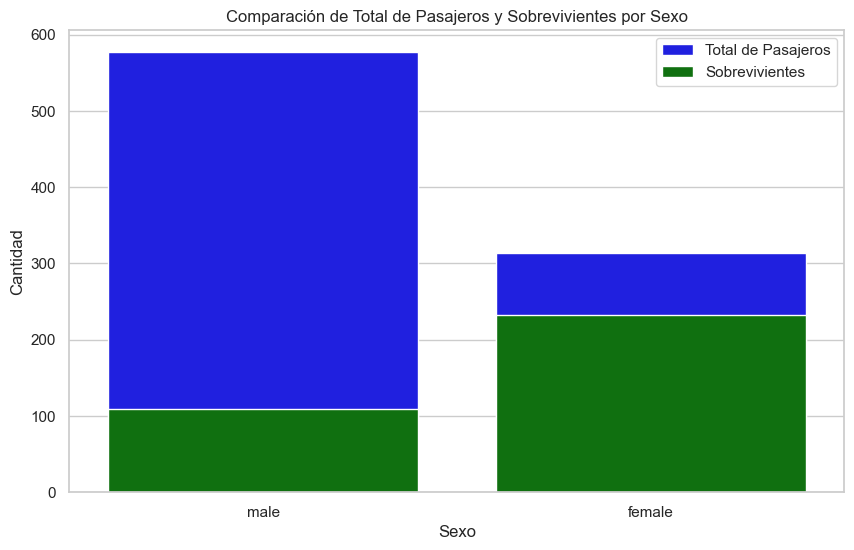

In [110]:
# Calcular el total de pasajeros por sexo
# Calcular el total de pasajeros por sexo
total_pasajeros_sexo = df_Titanic['Sex'].value_counts().reset_index()
total_pasajeros_sexo.columns = ['Sex', 'Total']

# Calcular los sobrevivientes por sexo
sobrevivientes_sexo = df_Titanic.groupby('Sex')['Survived'].sum().reset_index()

df_combined = pd.merge(total_pasajeros_sexo, sobrevivientes_sexo, on='Sex')

df_combined['Porcentaje'] = df_combined['Survived'] / df_combined['Total'] * 100

colores_personalizados = {'male': 'blue', 'female': 'green'}

plt.figure(figsize=(10, 6))

sns.barplot(x='Sex', y='Total', data=df_combined, color=colores_personalizados['male'], label='Total de Pasajeros')

# Barra para los sobrevivientes
sns.barplot(x='Sex', y='Survived', data=df_combined, color=colores_personalizados['female'], label='Sobrevivientes')

plt.title('Comparación de Total de Pasajeros y Sobrevivientes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.legend()
plt.show()

In [111]:
porcentaje_sobrevivientes_sexo = df_Titanic.groupby('Sex')['Survived'].mean() * 100
print(porcentaje_sobrevivientes_sexo)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


### 2º Relación Título Vs. Supervivencia

In [112]:
colores_personalizados = {
    'Mr': 'Blue',
    'Mrs': 'Pink',
    'Miss': 'Pink',
    'Master': 'Blue',
    'Nobles': 'Blue',
    'Marinos': 'Blue'
}

df_Titanic['Color'] = df_Titanic['Title'].map(colores_personalizados)
fig = px.bar(df_Titanic, x='Title', y='Survived', color='Title', color_discrete_map=colores_personalizados,
             labels={'Title': 'Título', 'Survived': 'Sobrevivencia'},
             title='Sobrevivencia por Título')

fig.show()

C:\Users\Ariel\AppData\Local\Temp\ipykernel_13544\1296090588.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




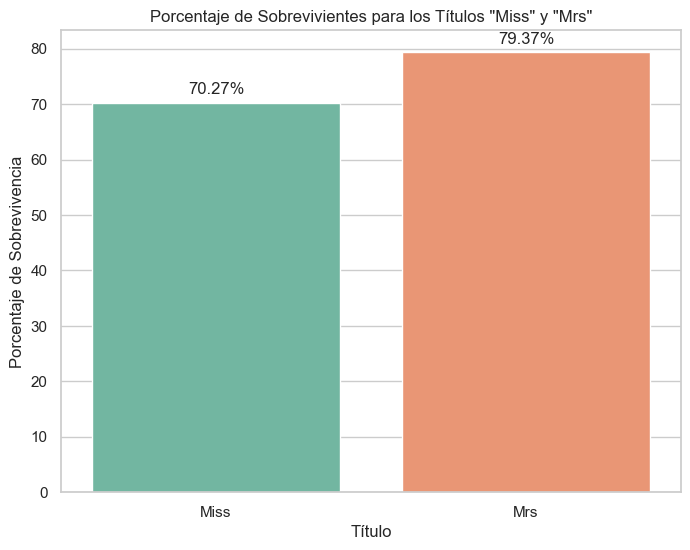

In [113]:
sns.set(style="whitegrid")

# solo los registros con los títulos "Miss" y "Mrs"
df_mrs_miss = df_Titanic[df_Titanic['Title'].isin(['Miss', 'Mrs'])]

# sobrevivientes para cada título
porcentaje_sobrevivientes = df_mrs_miss.groupby('Title')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=porcentaje_sobrevivientes.index, y=porcentaje_sobrevivientes.values, palette="Set2")

plt.title('Porcentaje de Sobrevivientes para los Títulos "Miss" y "Mrs"')
plt.xlabel('Título')
plt.ylabel('Porcentaje de Sobrevivencia')

for i, porcentaje in enumerate(porcentaje_sobrevivientes):
    plt.text(i, porcentaje + 1, f'{porcentaje:.2f}%', ha='center', va='bottom')
plt.show()

In [114]:
sns.set(style="whitegrid")
# registros de Miss y Mrs que sobrevivieron
df_sobrevivientes_miss_mrs = df_Titanic[(df_Titanic['Survived'] == 1) & ((df_Titanic['Title'] == 'Miss') | (df_Titanic['Title'] == 'Mrs'))]

# porcentaje de sobrevivientes con los títulos Miss y Mrs en comparación con el total de sobrevivientes
porcentaje_sobrevivientes_miss_mrs = (len(df_sobrevivientes_miss_mrs) / len(df_Titanic[df_Titanic['Survived'] == 1])) * 100
print(f"Porcentaje de sobrevivientes con títulos Miss y Mrs: {porcentaje_sobrevivientes_miss_mrs:.2f}%")

Porcentaje de sobrevivientes con títulos Miss y Mrs: 67.25%


In [115]:
porcentaje_sobrevivientes_titulo = df_Titanic.groupby('Title')['Survived'].mean() * 100
print(porcentaje_sobrevivientes_titulo)

Title
Marinos    40.000000
Master     57.500000
Miss       70.270270
Mr         15.667311
Mrs        79.365079
Nobles     33.333333
Name: Survived, dtype: float64


### 3º Relación Clase Vs. Supervivencia

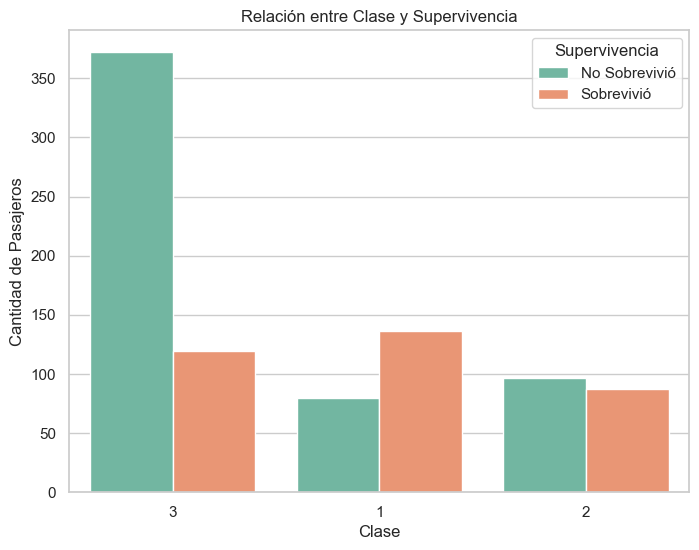

In [116]:

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x="Pclass", hue="Survived", data=df_Titanic, palette="Set2")

plt.title('Relación entre Clase y Supervivencia')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Supervivencia', labels=['No Sobrevivió', 'Sobrevivió'])

plt.show()

C:\Users\Ariel\AppData\Local\Temp\ipykernel_13544\4241806356.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




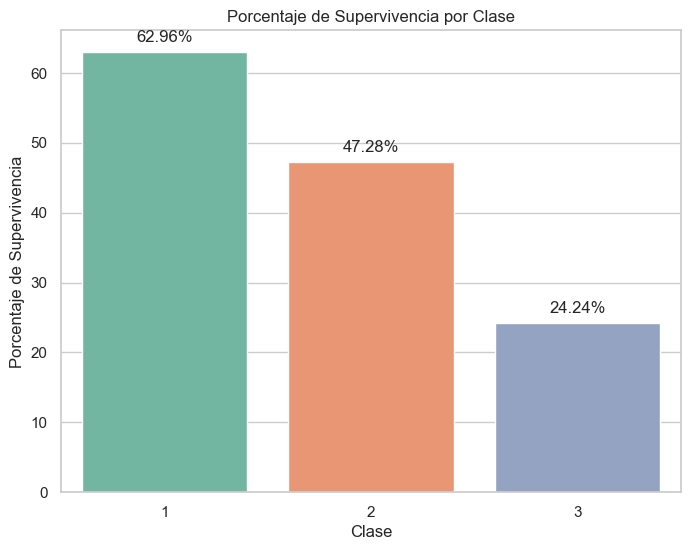

In [117]:
sns.set(style="whitegrid")
porcentajes_supervivencia = df_Titanic.groupby('Pclass')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=porcentajes_supervivencia.index, y=porcentajes_supervivencia.values, palette="Set2")

plt.title('Porcentaje de Supervivencia por Clase')
plt.xlabel('Clase')
plt.ylabel('Porcentaje de Supervivencia')

for i, porcentaje in enumerate(porcentajes_supervivencia):
    plt.text(i, porcentaje + 1, f'{porcentaje:.2f}%', ha='center', va='bottom')

plt.show()

### 4º Relación Tarifa Vs. Supervivencia

In [ ]:
print("Precio más bajo:", df_Titanic.Fare.min())
print("Precio más alto:", df_Titanic.Fare.max())

In [126]:
fig1 = px.histogram(df_Titanic, x='Fare', nbins=30, title='Distribución de la tarifa (Fare)_ total pasajeros embarcados')
fig1.update_xaxes(title='Tarifa (Fare)')
fig1.update_yaxes(title='Frecuencia')

#  distribución de Fare por sexo
fig2 = px.histogram(df_Titanic, x='Fare', color='Sex', barmode='overlay',
                    title='Distribución de la tarifa (Fare) por sexo_Total de pasajeros embarcados')
fig2.update_xaxes(title='Tarifa (Fare)')
fig2.update_yaxes(title='Frecuencia')
fig2.for_each_trace(lambda t: t.update(name='Male') if t.name == '0' else t.update(name='Female'))

fig1.show()
fig2.show()

In [127]:
survivors = df_Titanic[df_Titanic['Survived'] == 1]

fig = px.histogram(survivors, x='Fare', title='Sobrevivientes y sus respectvas Tarifas', 
                   labels={'Fare': 'Tarifa', 'count': 'Cantidad de Sobrevivientes'})
fig.update_layout(bargap=0.1)  
fig.show()

### 5º Relación Niño/Adulto Vs. Supervivencia

In [119]:
porcentaje_sobrevivientes_tipo_edad = df_Titanic.groupby('Tipo_Edad')['Survived'].mean() * 100

print(porcentaje_sobrevivientes_tipo_edad)

Tipo_Edad
Adulto    36.687117
Niño      56.578947
Name: Survived, dtype: float64


In [120]:
children = df_Titanic[df_Titanic['Age_Category'] == 'Niño']
adults = df_Titanic[df_Titanic['Age_Category'] == 'Adulto']

total_children = children['Sex'].value_counts().reset_index()
total_children.columns = ['Sex', 'Total']

total_adults = adults['Sex'].value_counts().reset_index()
total_adults.columns = ['Sex', 'Total']

survived_children = children.groupby('Sex')['Survived'].sum().reset_index()
survived_adults = adults.groupby('Sex')['Survived'].sum().reset_index()

bar_children = go.Bar(
    x=total_children['Sex'],
    y=total_children['Total'],
    name='Niños'
)

bar_adults = go.Bar(
    x=total_adults['Sex'],
    y=total_adults['Total'],
    name='Adultos'
)

bar_survived_children = go.Bar(
    x=survived_children['Sex'],
    y=survived_children['Survived'],
    name='Sobrevivientes Niños'
)

bar_survived_adults = go.Bar(
    x=survived_adults['Sex'],
    y=survived_adults['Survived'],
    name='Sobrevivientes Adultos'
)

layout = go.Layout(
    title='Comparación de Niños y Adultos por Sexo y Supervivencia',
    xaxis=dict(title='Sexo'),
    yaxis=dict(title='Cantidad'),
    barmode='group' 
)

fig = go.Figure(data=[bar_children, bar_adults, bar_survived_children, bar_survived_adults], layout=layout)

pyo.iplot(fig)

### 6º Relación Tipo de Cabina Vs. Supervivenvcia

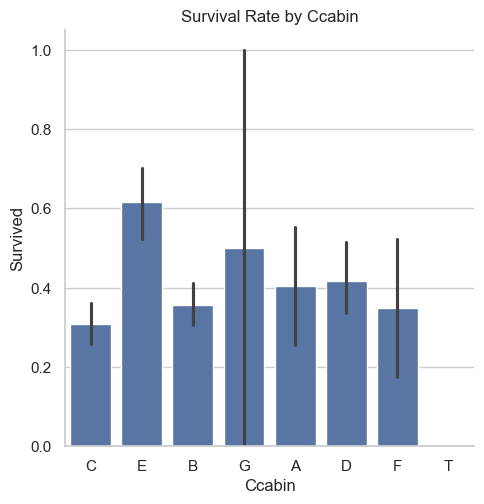

In [121]:
sns.catplot(x="Ccabin", y="Survived", data=df_Titanic, kind="bar")
plt.title('Survival Rate by Ccabin')
plt.xlabel('Ccabin')
plt.ylabel('Survived')
plt.show()

In [122]:
df_Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,LastName,Cabin_NumberCat,Ccabin,Title,Codigo_Titulo,Age_Category,Tipo_Edad,Tipo_Cabina,Color
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,S,Braund,65.166667,C,Mr,1,Adulto,Adulto,3,Blue
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,C,Cumings,1.000000,C,Mrs,3,Adulto,Adulto,3,Pink
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,S,Heikkinen,67.166667,C,Miss,2,Adulto,Adulto,3,Pink
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,S,Futrelle,2.000000,C,Mrs,3,Adulto,Adulto,3,Pink
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,S,Allen,85.833333,E,Mr,1,Adulto,Adulto,5,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,...,S,Montvila,81.666667,B,Nobles,5,Adulto,Adulto,2,Blue
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,...,S,Graham,146.000000,B,Miss,2,Adulto,Adulto,2,Pink
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.666667,1,2,W./C. 6607,23.4500,...,S,Johnston,75.833333,D,Miss,2,Adulto,Adulto,4,Pink
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,...,C,Behr,147.000000,C,Mr,1,Adulto,Adulto,3,Blue


### 7º Sobrevivientes por catgoria de edad, sexo y clase

In [123]:
df_Titanic['Age_Category'] = pd.cut(df_Titanic['Age'], bins=[0, 12, df_Titanic['Age'].max()], labels=['Niño', 'Adulto'])

# Agrupación por 'Pclass', 'Sex' y 'Age_Category' para contar el número de pasajeros
df_NAMS = df_Titanic.groupby(['Pclass', 'Sex', 'Age_Category','Survived']).size().reset_index(name='Count')

# Visualización del DataFrame resultante
df_NAMS

C:\Users\Ariel\AppData\Local\Temp\ipykernel_13544\2227999974.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Pclass,Sex,Age_Category,Survived,Count
0,1,female,Niño,0,1
1,1,female,Niño,1,0
2,1,female,Adulto,0,2
3,1,female,Adulto,1,91
4,1,male,Niño,0,0
5,1,male,Niño,1,3
6,1,male,Adulto,0,77
7,1,male,Adulto,1,42
8,2,female,Niño,0,0
9,2,female,Niño,1,8
